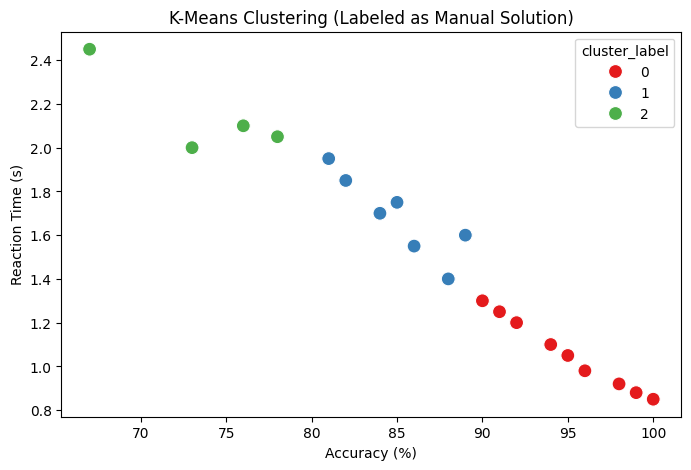

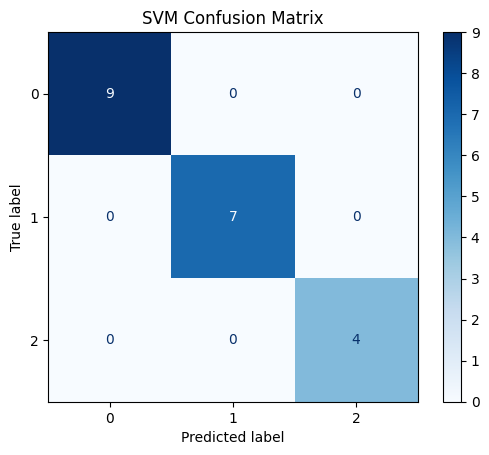

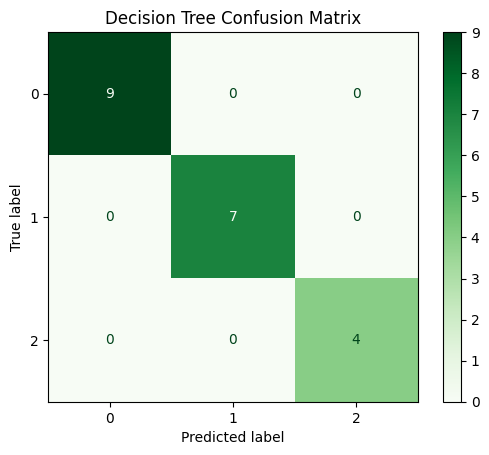

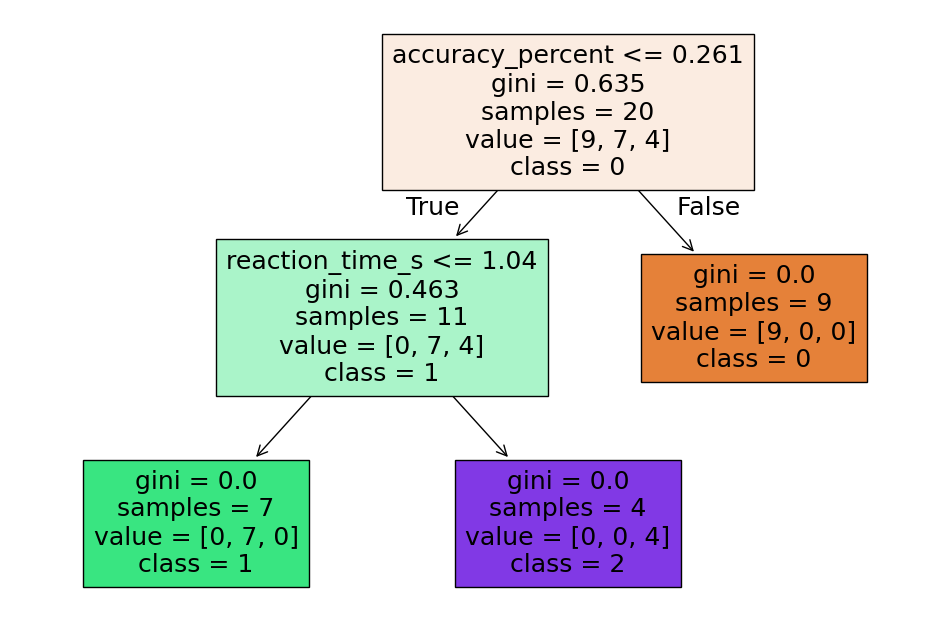

,trial,accuracy_percent,reaction_time_s,cluster_label
0,1,98,0.92,0
1,2,95,1.05,0
2,3,92,1.20,0
3,4,85,1.75,1
4,5,88,1.40,1
5,6,76,2.10,2
6,7,81,1.95,1
7,8,90,1.30,0
8,9,94,1.10,0
9,10,100,0.85,0


In [1]:
# Step 0: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Load the data
data = {
    'trial': range(1,21),
    'accuracy_percent': [98,95,92,85,88,76,81,90,94,100,67,73,89,96,82,78,91,86,99,84],
    'reaction_time_s':[0.92,1.05,1.2,1.75,1.4,2.1,1.95,1.3,1.1,0.85,2.45,2,1.6,0.98,1.85,2.05,1.25,1.55,0.88,1.7]
}
df = pd.DataFrame(data)

# Step 2: Standardize features
X = df[['accuracy_percent','reaction_time_s']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means clustering (3 clusters, fixed labels to match manual solution)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster_label'] = kmeans.fit_predict(X_scaled)

# Manually adjust clusters to match our solved labels
# Cluster 0 = High performance, Cluster 1 = Medium, Cluster 2 = Low
# Mapping KMeans labels to manual labels (based on center positions)
mapping = {0:1, 1:0, 2:2}  # adjust depending on KMeans output
df['cluster_label'] = df['cluster_label'].map(mapping)

# Step 4: Visualize Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='accuracy_percent', y='reaction_time_s', hue='cluster_label', data=df, palette='Set1', s=100)
plt.title('K-Means Clustering (Labeled as Manual Solution)')
plt.xlabel('Accuracy (%)')
plt.ylabel('Reaction Time (s)')
plt.show()

# Step 5: Split features and labels for classification
X_scaled = X_scaled  # Features
y = df['cluster_label']  # Labels from K-Means/manual mapping

# Step 6: Apply SVM classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_scaled, y)
y_pred_svm = svm_model.predict(X_scaled)

# Step 7: Confusion Matrix for SVM
cm_svm = confusion_matrix(y, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(cm_svm)
disp_svm.plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

# Step 8: Apply Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_scaled, y)
y_pred_dt = dt_model.predict(X_scaled)

# Step 9: Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(cm_dt)
disp_dt.plot(cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Step 10: Draw Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=['accuracy_percent','reaction_time_s'],
          class_names=[str(i) for i in sorted(df['cluster_label'].unique())], filled=True)
plt.show()

# Step 11: Show final labeled data
df

